In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline

In [102]:
# loans_tr 데이터를 load
df = pd.read_csv("loans_tr.csv")

In [103]:
df.head(5)

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [104]:
df.isna().sum()

Unnamed: 0           0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [105]:
# Exploratory Data Aanalysis

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [115]:
df= pd.get_dummies(df)

In [116]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [117]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8.578000e+03,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.00000,8578.000000,8578.000000,8578.000000,8578.000000
mean,0.803567,0.122617,318.093373,10.932431,12.622325,710.749709,4547.756538,1.706579e+04,46.757076,1.571695,0.164607,0.062252,0.159594,0.242714,0.133248,0.41350,0.035906,0.064817,0.046048,0.063768
std,0.397323,0.026817,206.994270,0.615859,6.881663,38.088227,2494.931515,3.450448e+04,29.000330,2.197341,0.550745,0.264656,0.366251,0.428749,0.339862,0.49249,0.186066,0.246217,0.209601,0.244353
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.570000,10.555813,7.242500,682.000000,2792.781250,3.193250e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,267.740000,10.928884,12.660000,707.000000,4110.041667,8.690000e+03,46.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,430.750000,11.294022,17.960000,737.000000,5729.958333,1.843375e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [99]:
# Object type data 

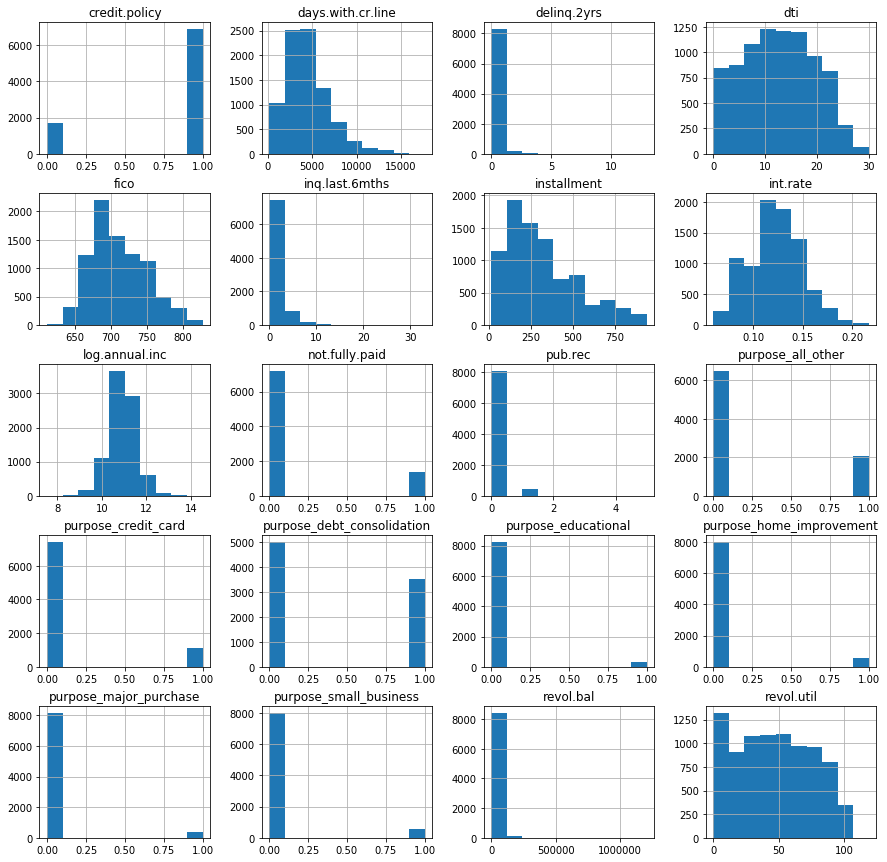

In [118]:
plt.rcParams['figure.figsize'] = (15,15)
df.hist()
plt.show()

In [120]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [59]:
#df['inq.last.6mths'] = np.where(df['inq.last.6mths'] >= 1, 1, 0)

In [60]:
#pd.get_dummies(data= df['inq.last.6mths']).sum()

0    3269
1    5309
dtype: int64

In [65]:
#df['delinq.2yrs'] = np.where(df['delinq.2yrs'] > 0, 1, 0)

In [66]:
#pd.get_dummies(data = df['delinq.2yrs']).sum()

0    7571
1    1007
dtype: int64

In [69]:
#df['pub.rec'] = np.where(df['pub.rec'] > 0, 1, 0)

In [70]:
#pd.get_dummies(data = df['pub.rec']).sum()

0    8080
1     498
dtype: int64

In [71]:
# X_data, y_data division

In [122]:
x_data = df.drop('not.fully.paid', axis =1)
y_data = df.iloc[:,-8]

In [124]:
x_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,0,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,1,0,0,0,0


In [ ]:
# train data, test data division

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1234)
array = df.values

In [126]:
# Compare Algorithms - model selection

In [127]:
num_folds = 10
num_instances = len(x_train)
seed = 10
scoring = 'accuracy'

In [128]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [129]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fracti

In [130]:
results = []
names = []
for name, model in models:
    
    kf = KFold(n_splits=num_folds, random_state=seed) #n=num_instances, 
    cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
print(results)

LR: 0.841273 (0.013935)
SVM: 0.842105 (0.013817)
KNN: 0.818456 (0.013324)
CART: 0.742679 (0.018232)
NB: 0.826285 (0.015770)
RF: 0.832611 (0.012457)
[array([0.85856905, 0.84858569, 0.82362729, 0.83361065, 0.835     ,
       0.82666667, 0.86      , 0.825     , 0.84166667, 0.86      ]), array([0.85856905, 0.85024958, 0.82529118, 0.83693844, 0.835     ,
       0.83      , 0.85833333, 0.82166667, 0.84333333, 0.86166667]), array([0.83194676, 0.82362729, 0.80865225, 0.80033278, 0.815     ,
       0.81166667, 0.835     , 0.79833333, 0.82166667, 0.83833333]), array([0.71547421, 0.76539101, 0.73377704, 0.71381032, 0.73666667,
       0.755     , 0.735     , 0.75833333, 0.76833333, 0.745     ]), array([0.84193012, 0.82695507, 0.80033278, 0.81863561, 0.82666667,
       0.82166667, 0.86      , 0.80833333, 0.83166667, 0.82666667]), array([0.8469218 , 0.84193012, 0.8202995 , 0.82529118, 0.83666667,
       0.82      , 0.855     , 0.815     , 0.82666667, 0.83833333])]


In [136]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [137]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))])),
 ('ScaledSVM', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=Non

In [138]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.841772 (0.014307)
ScaledSVM: 0.840107 (0.013240)
ScaledKNN: 0.822619 (0.013599)
ScaledCART: 0.744676 (0.014568)
ScaledNB: 0.776316 (0.011405)
ScaledRF: 0.834944 (0.013616)


In [3]:
# pipeline을 활용해서 scaling하고 optimal model selection

In [134]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))])),
 ('ScaledSVM', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))])),
 ('KNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_j

In [139]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold( n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.842605 (0.013571)
ScaledSVM: 0.841605 (0.013127)
ScaledKNN: 0.824282 (0.015363)
ScaledCART: 0.741844 (0.020811)
ScaledNB: 0.776316 (0.011405)
ScaledRF: 0.835276 (0.010691)


In [4]:
# ensemble 과 grid search를 활용한 model selection

In [140]:
# Tune scaled-KNN
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kf = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kf)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.840273 using {'n_neighbors': 19}


In [ ]:
# final test score - test data

In [141]:
n_estimators_set = [5,10,15,20,25,30,35,40]
max_features_set = ['sqrt', 'log2', None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.841106 using {'max_features': 'log2', 'n_estimators': 30}


In [143]:
loans_ts = pd.read_csv('loans_ts.csv')
loans_ts = pd.get_dummies(loans_ts)
loans_ts.head()

,Unnamed: 0,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,8150,0,0.1299,505.34,11.407565,10.24,672,2250.000000,4162,68.4,...,0,1,1,0,0,0,0,0,0,1
1,7086,1,0.1062,618.64,11.289782,13.29,737,5070.000000,14462,36.1,...,0,0,0,0,1,0,0,0,0,0
2,9374,0,0.1531,139.27,10.555813,8.34,667,3810.041667,1151,9.8,...,0,0,0,1,0,0,0,0,0,0
3,7439,1,0.1570,280.09,10.874266,7.36,662,4770.000000,10973,87.8,...,1,0,1,0,0,0,0,1,0,0
4,5345,1,0.1531,870.39,11.727372,16.65,707,10590.000000,40413,85.6,...,0,0,0,0,1,0,0,0,0,0


In [163]:
loans_ts.drop('Unnamed: 0', axis= 1, inplace= True)
loans_ts_x = loans_ts.drop('not.fully.paid', axis = 1)
loans_ts_y = loans_ts.iloc[:,-8]


KeyError: "labels ['Unnamed: 0'] not contained in axis"

In [164]:
loans_ts_y

0      1
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     1
19     1
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    1
973    0
974    1
975    0
976    0
977    0
978    0
979    1
980    0
981    0
982    0
983    0
984    0
985    1
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: not.fully.paid, Length: 1000, dtype: int64

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(loans_ts_x, loans_ts_y, test_size = 0.3, random_state = 1234)
array = df.values

In [157]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.834286 using {'max_features': 'sqrt', 'n_estimators': 15}


In [158]:
final_pipelines = []
final_pipelines.append(('Tuned_RF', Pipeline([('RF', RandomForestClassifier(max_features = 'sqrt', n_estimators = 20))])))

In [165]:
cm = []
accuracy = []
names = []
for name, model in final_pipelines:
    model.fit(x_train, y_train)
    y_test_hat = model.predict(x_test)
    cm.append(confusion_matrix(y_test, y_test_hat))
    accuracy.append(accuracy_score(y_test, y_test_hat))
    names.append(name)

In [166]:
names

['Tuned_RF']

In [167]:
cm

[array([[244,   5],
        [ 49,   2]], dtype=int64)]

In [168]:
accuracy

[0.82]